In [191]:
import pandas as pd
import numpy as np

## Import the data from a website :

For each question below please have the output showing that the command worked. This will help our TA grade your homeworks faster which I am sure that he will appreciate.

Note : loading the data take a little while, so don't panic ;)

In [192]:
# URL containing the data
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

# Read in the csv file from a website
df_retail = pd.read_csv(url, encoding = 'latin1')

# Show the first 5 entries of the dataframe
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [193]:
#Checking the dimensions of our data
df_retail.shape

(541909, 8)

### 1) Change the column InvoiceNo to OrderNo and make it the indices for the dataframe. Drop the column InvoiceDate

In [194]:
#Change column InvoiceNo to OrderNo
df_retail.rename(columns={'InvoiceNo':'OrderNo'}, inplace=True)
df_retail.head(1)

,OrderNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom


### 2) Find the average amount people spent per country regardless of item, the average number of items sold per country and the total number of each item ordered.

In [195]:
#Average amount spent across all items
df_retail['Amount_Spent'] = df_retail['UnitPrice']*df_retail['Quantity']

# Average amount People Spent pert OrderNo By Country
pd.DataFrame(df_retail.groupby('Country')['Amount_Spent'].mean())


,Amount_Spent
Country,
Australia,108.877895
Austria,25.322494
Bahrain,28.863158
Belgium,19.773301
Brazil,35.737500
Canada,24.280662
Channel Islands,26.499063
Cyprus,20.813971
Czech Republic,23.590667


In [196]:
# Average amount spent on all orderNo's
df_retail['Amount_Spent'].mean()

17.987794877005495

In [197]:
#Average number of items sold per country
pd.DataFrame(df_retail.groupby('Country')['Quantity'].mean())
#Commit

,Quantity
Country,
Australia,66.444003
Austria,12.037406
Bahrain,13.684211
Belgium,11.189947
Brazil,11.125000
Canada,18.298013
Channel Islands,12.505277
Cyprus,10.155949
Czech Republic,19.733333


In [198]:
#Total number of each item sold worldwide by country
df_retail.groupby(['Country', 'StockCode'])['Quantity'].sum()


Country      StockCode
Australia    15036        600
             15056BL        3
             16161P       400
             16169E        25
             20665          6
                         ... 
Unspecified  85180A         2
             85180B         1
             85212         12
             85213         12
             85227         10
Name: Quantity, Length: 19839, dtype: int64

In [199]:
# The total number of items sold by a country
df_retail.groupby(['Country'])['Quantity'].sum()

Country
Australia                 83653
Austria                    4827
Bahrain                     260
Belgium                   23152
Brazil                      356
Canada                     2763
Channel Islands            9479
Cyprus                     6317
Czech Republic              592
Denmark                    8188
EIRE                     142637
European Community          497
Finland                   10666
France                   110480
Germany                  117448
Greece                     1556
Hong Kong                  4769
Iceland                    2458
Israel                     4353
Italy                      7999
Japan                     25218
Lebanon                     386
Lithuania                   652
Malta                       944
Netherlands              200128
Norway                    19247
Poland                     3653
Portugal                  16180
RSA                         352
Saudi Arabia                 75
Singapore                  5234


### 3) Remove all rows that contain any missing data, have negative values in Quantity and any rows that have products that cost 10 cents or less, then find all the items that cost 25 cents or less.

In [200]:
df_retail.shape

(541909, 9)

In [201]:
#Dropping rows with missing data
df_retail.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df_retail.shape

(406829, 9)

In [202]:
#Dropping rows with items costing 10 cents or less.
df_retail.drop(df_retail[df_retail['UnitPrice'] <= .10].index, inplace=True)
df_retail.shape

(406482, 9)

In [203]:
#Dropping all rows with negative quantities in Quantity column
df_retail.drop(df_retail[df_retail['Quantity'] < 0].index, inplace=True)
df_retail.shape

(397585, 9)

In [217]:
#Retrieving all the items that cost 25 cents or less. This includes StockCode that is listed for two different prices below .25
df_retail[df_retail['UnitPrice'] <= .25][['StockCode','UnitPrice']].drop_duplicates(subset=None,keep='first').sort_values('StockCode')


,StockCode,UnitPrice
5452,10120,0.21
439386,10135,0.25
9211,15034,0.14
252830,16008,0.12
21342,16008,0.25
...,...,...
12423,M,0.19
437235,M,0.25
397589,M,0.12
29090,M,0.21


In [235]:
# Note that there are certain items that appear twice. Because the StockeCode Sold at two different Unit prices. Below is a list of all the stock codes you can purchase for under 25 cents
unique_StockCode = df_retail[df_retail['UnitPrice'] <= .25][['StockCode','UnitPrice']].drop_duplicates(subset=None,keep='first').copy()
unique_StockCode[~unique_StockCode.duplicated('StockCode')].sort_values('StockCode')

,StockCode,UnitPrice
5452,10120,0.21
439386,10135,0.25
9211,15034,0.14
21342,16008,0.25
10135,16010,0.12
...,...,...
539863,90086,0.19
524405,90087,0.19
530382,90089,0.19
530393,90093,0.19


In [239]:
# Displaying all of the StockCodes that are sold for different Prices
Duplicate_StockCode_2_Price = df_retail[df_retail['UnitPrice'] <= .25][['StockCode','UnitPrice']].drop_duplicates(subset=None,keep='first').copy()
Duplicate_StockCode_2_Price[Duplicate_StockCode_2_Price.duplicated('StockCode',keep=False)].sort_values(['StockCode','UnitPrice'])

,StockCode,UnitPrice
252830,16008,0.12
21342,16008,0.25
170398,16216,0.12
26386,16216,0.16
170400,16218,0.12
...,...,...
397589,M,0.12
12423,M,0.19
42421,M,0.20
29090,M,0.21


### 4) Create two dataframes, one with the data of the United Kingdom and another with the data for France. Then merge the two using the StockCode column and add the suffixes '_UK' to the data from the UK and '_FR' to the data from France

### Please comment on the number of rows that the result has compared to the number of rows the data originally had. Why did the number of rows increase ? What needs to be changed ?
There are a ton more rows on the merged data set because the dtwo data frames have duplicate values for StockCode. The Data was comprised on an OderNo Bases.
To change this we would look at the data from a completely different take. Maybe a list of the Stock codes in either country? I don't know why you would want to merge these two
data sets together like this. It doesn't really make analytical sense.

In [241]:
#Create dataframe with the data from UK
df_UK = df_retail[df_retail['Country'] == 'United Kingdom'].copy()
df_UK.head(10)

,OrderNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom,54.08


In [242]:

#Create dataframe with the data from France
df_FR = df_retail[df_retail['Country'] == 'France'].copy()
df_FR.head(10)

,OrderNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France,90.0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France,90.0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France,45.0
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France,10.2
30,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France,15.6
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France,40.8
32,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France,30.0
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France,53.1
34,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France,70.8
35,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France,46.8


In [259]:
#Merge both dataframes using StockCode to match the data
UK_FR = pd.merge(df_UK, df_FR, left_on='StockCode', right_on='StockCode', suffixes=('_UK', "_FR"), copy=True)
print("DF_Retail Shape:", df_retail.shape)
print("UK Merged with FR Shape:", UK_FR.shape)

DF_Retail Shape: (397585, 9)
UK Merged with FR Shape: (2434624, 17)


### 5) Create 3 labels : low, medium, shop-a-holic for each country based on the total number of good purchased.

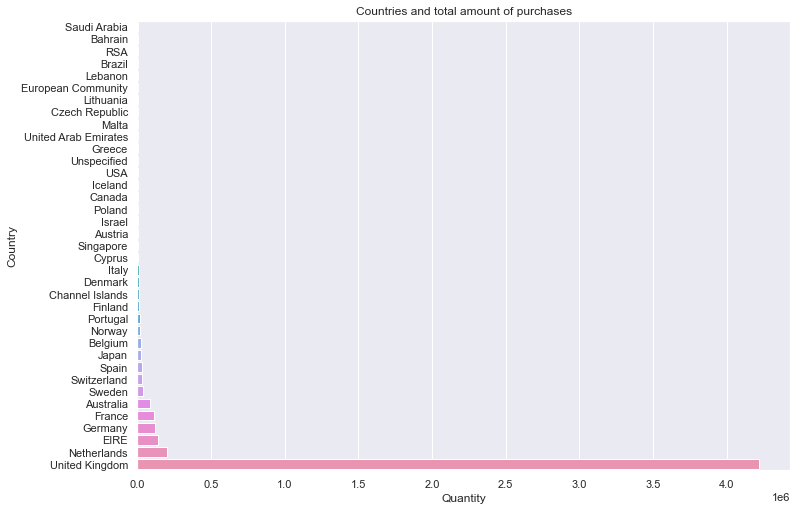

In [314]:
# First to see what we want our bins to look like we need to see what the total purchase are for each country
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
country_Purchases = df_retail.groupby(['Country']).sum()['Quantity'].sort_values().reset_index().copy()
sns.barplot(data=country_Purchases, y='Country', x='Quantity')
plt.title("Countries and total amount of purchases")
plt.show()

In [318]:
# It's Visually easy to see how we should assign the bins base on the total number of purchased goods now.
country_Purchases['Shopping Bin'] = np.where(country_Purchases['Quantity'] < 10000, "Low", 
                                                                np.where(country_Purchases['Quantity'] < 1000000, "Medium","Shop-a-holic"))
country_Purchases

# Labels

,Country,Quantity,Shopping Bin
0,Saudi Arabia,80,Low
1,Bahrain,260,Low
2,RSA,351,Low
3,Brazil,356,Low
4,Lebanon,386,Low
5,European Community,499,Low
6,Lithuania,652,Low
7,Czech Republic,671,Low
8,Malta,970,Low
9,United Arab Emirates,982,Low


### 6) Create a pivot table for the data.

### The table should provide the total number of products ordered for each product and every country. In other words, each product should have the associated coutries where that product was ordered and have the total number of that product that was ordered for each country.

Congratulations ! You made it to the end of the file. Your reward is a joke:

Q: What do you call a boomerang that doesn’t work?












































A: A stick.